In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%matplotlib notebook

import os
cpu='0'
os.environ['CUDA_VISIBLE_DEVICES']=cpu

from bio_learn import *

In [2]:
(train_X, train_y), (test_X, test_y) = get_data('train'), get_data('test')
print('train_data, test_data:', train_X.shape, train_y.shape, test_X.shape, test_y.shape)

train_data, test_data: torch.Size([60000, 784]) torch.Size([60000]) torch.Size([10000, 784]) torch.Size([10000])


In [3]:
np.random.seed(999)
file = 'weights_0.pkl'
if os.path.isfile(file):
    weights = torch.load(file)
else:
    weights = get_unsupervised_weights(train_X, n_hidden=2000, n_epochs=200, batch_size=3584)          
    torch.save(weights, file)

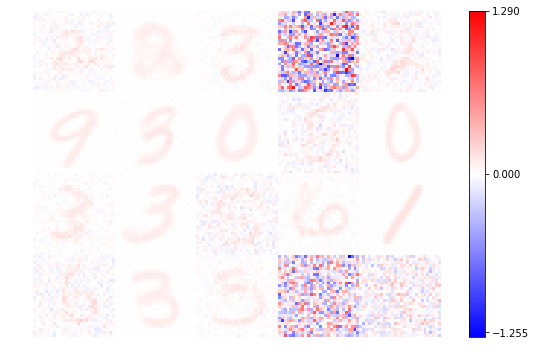

In [39]:
draw_weights(weights.cpu().numpy(), n_cols=5, n_rows=4)

In [5]:
print('\nSimpleConvNet Model')
run_test(train_X, train_y, test_X, test_y, SimpleConvNet(), 10) # 0.97 


SimpleConvNet Model
Final Validation Results - Epoch: 10  Avg accuracy: 0.97 Avg loss: 0.09


In [9]:
print('\nBioClassifier Model')
run_test(train_X, train_y, test_X, test_y, BioClassifier(BioCell(weights, .1, 10)), 100) # 0.10 


BioClassifier Model
Final Validation Results - Epoch: 100  Avg accuracy: 0.10 Avg loss: 2.70


In [7]:
print('\nSimpleBioClassifier Model')
run_test(train_X, train_y, test_X, test_y, SimpleBioClassifier(weights, 10), 100, 1e-2) # 0.90 


SimpleBioClassifier Model
Final Validation Results - Epoch: 100  Avg accuracy: 0.90 Avg loss: 4.08


In [12]:
print('\nBioConvClassifier Model')
run_test(train_X, train_y, test_X, test_y, BioConvClassifier(weights, 10), 20, 1e-2) # 0.11


BioConvClassifier Model
Final Validation Results - Epoch: 20  Avg accuracy: 0.11 Avg loss: -89299034.05


In [28]:
print('\nBioConvClassifier2 Model')
run_test(train_X, train_y, test_X, test_y, BioConvClassifier2(weights), 10, 1e-2) # 0.11 


BioConvClassifier2 Model
Final Validation Results - Epoch: 10  Avg accuracy: 0.11 Avg loss: 2.30


In [44]:
print('\nBioClassifier w/ BioCell2 Model')
run_test(train_X, train_y, test_X, test_y, BioClassifier(BioCell2(weights)), 100) # 0.10


BioClassifier w/ BioCell2 Model
Final Validation Results - Epoch: 100  Avg accuracy: 0.10 Avg loss: 2.63
